In [113]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

**Q1**

In [114]:
def est_gaus_par(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig

In [115]:
mean_1 = array([-3, 5]) # mu
cov_1 = matrix([
    [2, 1],
    [1, 3]
]) #sigma
x_1, y_1 = np.random.multivariate_normal(mean_1, cov_1, 30).T

X_1 = np.stack((np.array(x_1), np.array(y_1)), axis=-1) # [x, y]

mu_1, sigma_1 = est_gaus_par(X_1)

In [116]:
mean_2 = array([3, 5]) # mu
cov_2 = matrix([
    [2, -1],
    [-1, 3]
]) #sigma
x_2, y_2 = np.random.multivariate_normal(mean_2, cov_2, 40).T

X_2 = np.stack((np.array(x_2), np.array(y_2)), axis=-1)

mu_2, sigma_2 = est_gaus_par(X_2)

In [117]:
sample_1 = np.stack((np.array(x_1), np.array(y_1)), axis=-1)
sample_2 = np.stack((np.array(x_2), np.array(y_2)), axis=-1)
X = np.concatenate((sample_1, sample_2)).astype('float')
y = np.concatenate((np.zeros(30), np.ones(40))).astype('int')

**Q2**

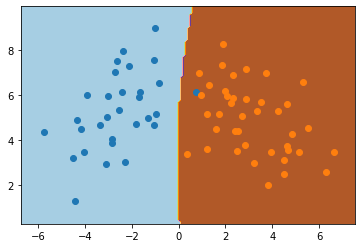

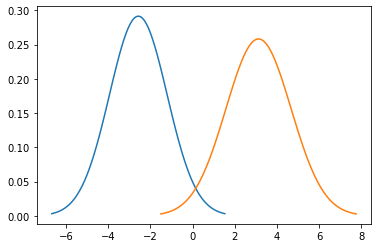

In [118]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model
model = GaussianNB()

# # fit the model
model.fit(X, y)

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# create scatter plot for samples from each class
for class_value in [0, 1]:
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

mu_1, sigma_1 = est_gaus_par(x_1)
mu_2, sigma_2 = est_gaus_par(x_2)

fig, ax = plt.subplots()
x1_g = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, 100)
x2_g = np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, 100)
plt.plot(x1_g, stats.norm.pdf(x1_g, mu_1, sigma_1))
plt.plot(x2_g, stats.norm.pdf(x2_g, mu_2, sigma_2))
plt.show()

In [119]:
# # Simple Linear Regression on the Swedish Insurance Dataset
# from random import seed
# from random import randrange
# from csv import reader
# from math import sqrt
 
# # Convert string column to float
# def str_column_to_float(dataset, column):
#     for row in dataset:
#         row[column] = float(row[column].strip())


# def mse_metric(actual, predicted):
#     sum_error = 0.0
#     for i in range(len(actual)):
#         prediction_error = predicted[i] - actual[i]
#         sum_error += (prediction_error ** 2)
#     mean_error = sum_error / float(len(actual))
#     return mean_error
 
# # Evaluate an algorithm using a train/test split
# def evaluate_algorithm(dataset, algorithm, split, *args):
#     train, test = train_test_split(dataset, split)
#     test_set = list()
#     for row in test:
#         row_copy = list(row)
#         row_copy[-1] = None
#         test_set.append(row_copy)
#     predicted = algorithm(train, test_set, *args)
#     actual = [row[-1] for row in test]
#     rmse = rmse_metric(actual, predicted)
#     return rmse

 
# # Simple linear regression algorithm
# def simple_linear_regression(train, test):
#     predictions = list()
#     b0, b1 = coefficients(train)
#     for row in test:
#         yhat = b0 + b1 * row[0]
#         predictions.append(yhat)
#     return predictions
 
# # Simple linear regression on insurance dataset
# seed(1)
# # load and prepare data
# filename = 'insurance.csv'
# dataset = load_csv(filename)
# for i in range(len(dataset[0])):
#     str_column_to_float(dataset, i)
# # evaluate algorithm
# split = 0.6
# rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
# print('RMSE: %.3f' % (rmse))

In [120]:
# # Calculate the mean value of a list of numbers
# def mean(values):
#     return sum(values) / float(len(values))
 
# # Calculate covariance between x and y
# def covariance(x, mean_x, y, mean_y):
#     covar = 0.0
#     for i in range(len(x)):
#         covar += (x[i] - mean_x) * (y[i] - mean_y)
#     return covar
 
# # Calculate the variance of a list of numbers
# def variance(values, mean):
#     return sum([(x-mean)**2 for x in values])
 
# # Calculate coefficients
# def coefficients(dataset):
#     x = [row[0] for row in dataset]
#     y = [row[1] for row in dataset]
#     x_mean, y_mean = mean(x), mean(y)
#     b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
#     b0 = y_mean - b1 * x_mean
#     return [b0, b1]

# predictions = list()
# b0, b1 = coefficients(X)
# for row in y:
#     yhat = b0 + b1 * y
#     predictions.append(yhat)
# predictions

**Q3**

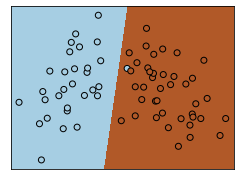

In [121]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

**Q4**

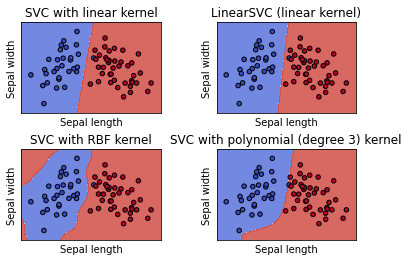

In [122]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

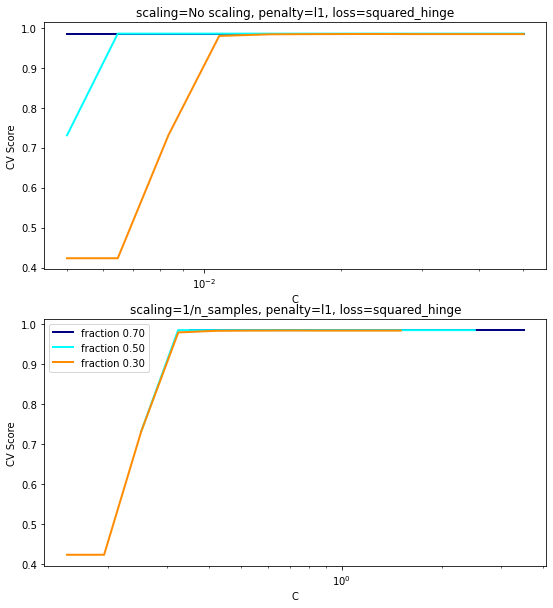

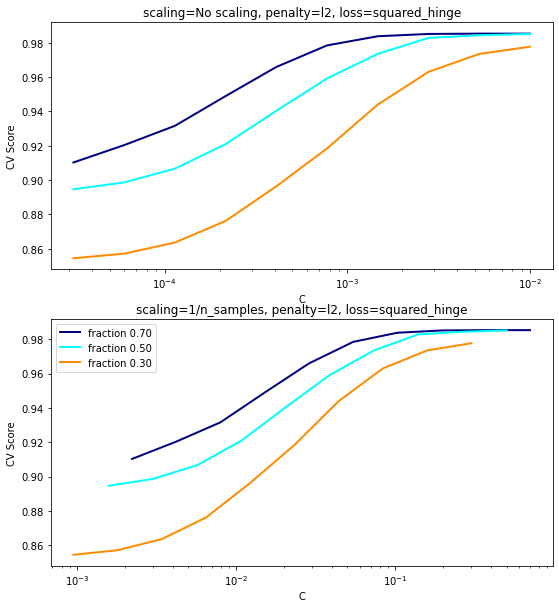

In [124]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets

rnd = check_random_state(1)

# set up dataset
n_samples = 100
n_features = 300

# l1 data (only 5 informative features)
X_1, y_1 = datasets.make_classification(n_samples=n_samples,
                                        n_features=n_features, n_informative=5,
                                        random_state=1)

# l2 data: non sparse, but less features
y_2 = np.sign(.5 - rnd.rand(n_samples))
X_2 = rnd.randn(n_samples, n_features // 5) + y_2[:, np.newaxis]
X_2 += 5 * rnd.randn(n_samples, n_features // 5)

clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
             np.logspace(-2.3, -1.3, 10), X, y),
            (LinearSVC(penalty='l2', loss='squared_hinge', dual=True),
             np.logspace(-4.5, -2, 10), X, y)]

colors = ['navy', 'cyan', 'darkorange']
lw = 2

for clf, cs, X, y in clf_sets:
    # set up the plot for each regressor
    fig, axes = plt.subplots(nrows=2, sharey=True, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        # To get nice curve, we need a large number of iterations to
        # reduce the variance
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size,
                                            test_size=.3,
                                            n_splits=250, random_state=1))
        grid.fit(X, y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for ax, (scaler, name) in zip(axes, scales):
            ax.set_xlabel('C')
            ax.set_ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            ax.semilogx(grid_cs, scores, label="fraction %.2f" %
                        train_size, color=colors[k], lw=lw)
            ax.set_title('scaling=%s, penalty=%s, loss=%s' %
                         (name, clf.penalty, clf.loss))

    plt.legend(loc="best")
plt.show()